In [2]:
#### link used -> https://hackernoon.com/scraping-amazon-product-information-with-python-and-beautifulsoup-yn4s3tgr


In [1]:
import requests
from bs4 import BeautifulSoup

#### Note
Amazon is quite sensitive when it comes to scraping and immediately displays captchas and content walls for their own data API.
To avoid that, we are defining a user agent, that we are going to use for our http request:

#### Find common user agents at
http://www.networkinghowtos.com/howto/common-user-agent-list/


In [7]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [5]:
url = 'https://www.amazon.com/FEICE-Stainless-Leathers-Waterproof-Business/dp/B074MWWTVL'
response = requests.get(url)
print(response.content[:200])

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->\n<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->\n<!--['


<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'><link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com"><link rel="dns-prefetch" href="https://m.media-amazon.com"><link rel="dns-prefetch" href="https://completion.amazon.com"><script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a]
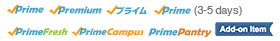
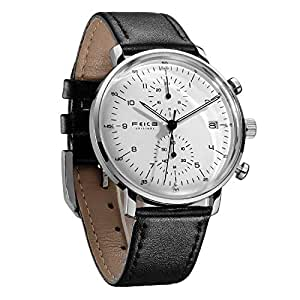

In [8]:
response = requests.get(url, headers=headers)
print(response.text)

In [9]:
soup = BeautifulSoup(response.content, features="lxml")

In [ ]:
#### title

In [11]:
title = soup.select("#productTitle")[0].get_text().strip()
title

'FEICE Men’s Watches Ultra Thin Analog Quartz Watch Stainless Steel Luminous Dual Time Casual Watches for Men with Leather Bands Calendar -FS021'

In [14]:
#### categories

In [12]:
catg=[]
for li in soup.select("#wayfinding-breadcrumbs_container ul.a-unordered-list")[0].findAll("li"):
    catg.append(li.get_text().strip())
print(catg)

['Clothing, Shoes & Jewelry', '›', 'Men', '›', 'Watches', '›', 'Wrist Watches']


In [13]:
### Features

In [15]:
features = []
for li in soup.select("#feature-bullets ul.a-unordered-list")[0].findAll('li'):
    features.append(li.get_text().strip())
print(features)

['Imported', '⌚ Classic Bauhaus Watch: Men’s classic casual wrist watch with imported Japanese quartz movement, paying homage to the Bauhaus style, 40mm big face white dial features three hands and Arabic numeral markers.', '⌚ Ultra Thin Quartz Watch: 6mm polished stainless steel case, matched with 4mm 2.5D domed mineral mirror. Lightweight and more comfortable to wear, suitable for daily life.', '⌚ Dual Time Display Wristwatch: You can set two times(set up the indicator as main time, and sub-time at the two sub-dials) during your International journey. Date calendar window at 3 o’clock.', '⌚ FEICE 2.5D DOMED MIRROR: Adopted double coating process, 99.6% high transparency which increases the clarity of dial and prevents the mirror from scratches. The built-in dial is also curved.', '⌚ Waterproof&Warranty: Water resistant to 3ATM(99 feet) in general, withstands splashes or brief immersion in water, but not suitable for swimming or bathing. Every watch in our shop enjoys 2 years warranty

In [16]:
### price

In [17]:
price = soup.select("#priceblock_saleprice")[0].get_text()
price

'$129.99'

In [18]:
#### review

In [20]:
review_count = int(soup.select("#acrCustomerReviewText")[0].get_text().split()[0])
review_count

38

In [21]:
#### convert above data to JSON format

In [22]:
import json

In [25]:
jsondata = {'title': title, 'categories': catg, 'features': features, 'price': price, 'review_count': review_count}
jsondata

{'title': 'FEICE Men’s Watches Ultra Thin Analog Quartz Watch Stainless Steel Luminous Dual Time Casual Watches for Men with Leather Bands Calendar -FS021',
 'categories': ['Clothing, Shoes & Jewelry',
  '›',
  'Men',
  '›',
  'Watches',
  '›',
  'Wrist Watches'],
 'features': ['Imported',
  '⌚ Classic Bauhaus Watch: Men’s classic casual wrist watch with imported Japanese quartz movement, paying homage to the Bauhaus style, 40mm big face white dial features three hands and Arabic numeral markers.',
  '⌚ Ultra Thin Quartz Watch: 6mm polished stainless steel case, matched with 4mm 2.5D domed mineral mirror. Lightweight and more comfortable to wear, suitable for daily life.',
  '⌚ Dual Time Display Wristwatch: You can set two times(set up the indicator as main time, and sub-time at the two sub-dials) during your International journey. Date calendar window at 3 o’clock.',
  '⌚ FEICE 2.5D DOMED MIRROR: Adopted double coating process, 99.6% high transparency which increases the clarity of di

In [27]:
print(json.dumps(jsondata, indent=2))

{
  "title": "FEICE Men\u2019s Watches Ultra Thin Analog Quartz Watch Stainless Steel Luminous Dual Time Casual Watches for Men with Leather Bands Calendar -FS021",
  "categories": [
    "Clothing, Shoes & Jewelry",
    "\u203a",
    "Men",
    "\u203a",
    "Watches",
    "\u203a",
    "Wrist Watches"
  ],
  "features": [
    "Imported",
    "\u231a Classic Bauhaus Watch: Men\u2019s classic casual wrist watch with imported Japanese quartz movement, paying homage to the Bauhaus style, 40mm big face white dial features three hands and Arabic numeral markers.",
    "\u231a Ultra Thin Quartz Watch: 6mm polished stainless steel case, matched with 4mm 2.5D domed mineral mirror. Lightweight and more comfortable to wear, suitable for daily life.",
    "\u231a Dual Time Display Wristwatch: You can set two times(set up the indicator as main time, and sub-time at the two sub-dials) during your International journey. Date calendar window at 3 o\u2019clock.",
    "\u231a FEICE 2.5D DOMED MIRROR: A